# Hyperparameter tuning

ESM-2 and ESM-1b, binary and continuous

In [7]:
import pandas as pd
from ray.tune import ExperimentAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', style="darkgrid", font="serif", palette=None, font_scale=1.1)

In [44]:
# Reading binary results
df_hyp_disprot_esm1 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm1").results_df.dropna(subset=['loss'])
df_hyp_disprot_esm2 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_disprot_esm2").results_df.dropna(subset=['loss'])

df_hyp_disprot_esm1['model_name'] = 'facebook/esm-1b'
df_hyp_disprot_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_hyp_disprot = pd.concat([df_hyp_disprot_esm1, df_hyp_disprot_esm2])

In [14]:
# Reading continuous results
df_hyp_chezod_esm1 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_chezod_esm1").results_df.dropna(subset=['loss'])
df_hyp_chezod_esm2 = ExperimentAnalysis("../data/results/hyperparam_tune/hyperparam_tune_chezod_esm2").results_df.dropna(subset=['loss'])

df_hyp_chezod_esm1['model_name'] = 'facebook/esm-1b'
df_hyp_chezod_esm2['model_name'] = 'esm2_t33_650M_UR50D'

df_hyp_chezod = pd.concat([df_hyp_chezod_esm1, df_hyp_chezod_esm2])

### Choosing Embedding

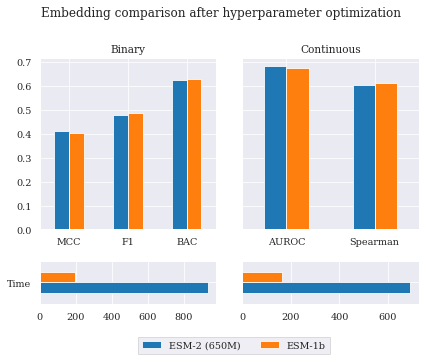

In [67]:
%matplotlib inline
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(6, 4), gridspec_kw={'height_ratios': [1, 0.25]},
                                             sharey='row')
fig.tight_layout()

df_hyp_disprot.groupby(by='model_name').mean()[['mcc', 'f1', 'bac']].T.plot(ax=ax1, kind='bar', rot=0, title='Binary', legend=False)
ax1.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

df_hyp_disprot.groupby(by='model_name').mean()[['time_this_iter_s']].T.plot(ax=ax3, kind="barh", rot=0, legend=False)
ax3.set_yticks([0], labels=['Time'])

df_hyp_chezod.groupby(by='model_name').mean()[['auroc', 'spearman']].T.plot(ax=ax2, kind='bar', rot=0, title='Continuous', legend=False)
ax2.set_xticks(range(2), labels=['AUROC', 'Spearman'])

df_hyp_chezod.groupby(by='model_name').mean()[['time_this_iter_s']].T.plot(ax=ax4, kind="barh", rot=0, legend=False)
ax4.set_yticks([0], labels=['Time'])

ax1.legend(labels=['ESM-2 (650M)', 'ESM-1b'], loc='upper center', bbox_to_anchor=(1.1, -0.6), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Embedding comparison after hyperparameter optimization', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_embeddings_with_time.png', bbox_inches='tight')
plt.show()

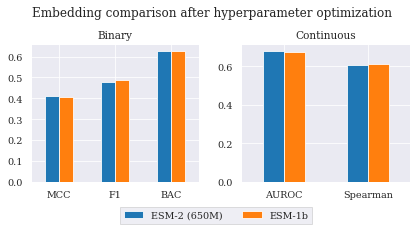

In [71]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 2.5))
fig.tight_layout()

df_hyp_disprot.groupby(by='model_name').mean()[['mcc', 'f1', 'bac']].T.plot(ax=ax1, kind='bar', rot=0, title='Binary', legend=False)
ax1.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])


df_hyp_chezod.groupby(by='model_name').mean()[['auroc', 'spearman']].T.plot(ax=ax2, kind='bar', rot=0, title='Continuous', legend=False)
ax2.set_xticks(range(2), labels=['AUROC', 'Spearman'])

ax1.legend(labels=['ESM-2 (650M)', 'ESM-1b'], loc='upper center', bbox_to_anchor=(1.1, -0.15), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Embedding comparison after hyperparameter optimization', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_embeddings.png', bbox_inches='tight')
plt.show()

### Comparing important hyperparameters

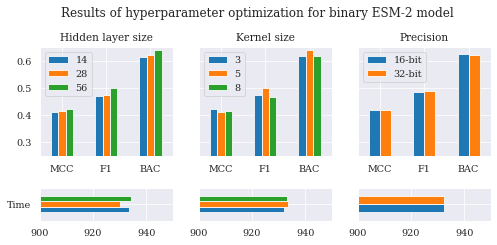

In [84]:
%matplotlib inline
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(7, 3), gridspec_kw={'height_ratios': [1, 0.3]}, sharey='row')
fig.tight_layout()

# Hidden layer accuracy
df_hyp_disprot_esm2.groupby(by='config/cnn_bottleneck').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax1, kind="bar", rot=0, title='Hidden layer size')
ax1.legend(labels=['14', '28', '56'])
ax1.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])
ax1.set_ylim([0.25, 0.65])

# Hidden layer times
df_hyp_disprot_esm2.groupby(by='config/cnn_bottleneck').median()[['time_this_iter_s']].T.plot(ax=ax4, kind="barh", rot=0, legend=False)
ax4.set_yticks([0], labels=['Time'])
ax4.set_xlim([900, 950])

# Kernel size accuracy
df_hyp_disprot_esm2.groupby(by='config/cnn_kernel_n').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax2, kind="bar", rot=0, title='Kernel size')
ax2.legend(labels=['3', '5', '8'])
ax2.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

# Kernel size time
df_hyp_disprot_esm2.groupby(by='config/cnn_kernel_n').median()[['time_this_iter_s']].T.plot(ax=ax5, kind="barh", rot=0, legend=False)
ax5.set_yticks([0], labels=['Time'])
ax5.set_xlim([900, 950])

# Precision accuracy
df_hyp_disprot_esm2.groupby(by='config/precision').median()[['mcc', 'f1', 'bac']].T.plot(ax=ax3, kind="bar", rot=0, title='Precision')
ax3.legend(labels=['16-bit', '32-bit'])
ax3.set_xticks(range(3), labels=['MCC', 'F1', 'BAC'])

# Precision times
df_hyp_disprot_esm2.groupby(by='config/precision').median()[['time_this_iter_s']].T.plot(ax=ax6, kind="barh", rot=0, legend=False)
ax6.set_yticks([0], labels=['Time'])
ax6.set_xlim([900, 950])

fig.suptitle('Results of hyperparameter optimization for binary ESM-2 model', fontsize=12, y=1.12)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_optim_disprot.png', bbox_inches='tight')
plt.show()

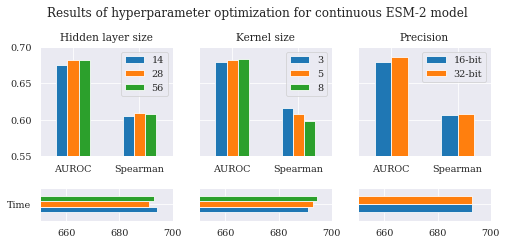

In [83]:
%matplotlib inline
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(7, 3), gridspec_kw={'height_ratios': [1, 0.3]}, sharey='row')
fig.tight_layout()

# Hidden layer accuracy
df_hyp_chezod_esm2.groupby(by='config/cnn_bottleneck').median()[['auroc', 'spearman']].T.plot(ax=ax1, kind="bar", rot=0, title='Hidden layer size')
ax1.legend(labels=['14', '28', '56'])
ax1.set_xticks(range(2), labels=['AUROC', 'Spearman'])
ax1.set_ylim([0.55, 0.7])

# Hidden layer times
df_hyp_chezod_esm2.groupby(by='config/cnn_bottleneck').median()[['time_this_iter_s']].T.plot(ax=ax4, kind="barh", rot=0, legend=False)
ax4.set_yticks([0], labels=['Time'])
ax4.set_xlim([650, 700])

# Kernel size accuracy
df_hyp_chezod_esm2.groupby(by='config/cnn_kernel_n').median()[['auroc', 'spearman']].T.plot(ax=ax2, kind="bar", rot=0, title='Kernel size')
ax2.legend(labels=['3', '5', '8'])
ax2.set_xticks(range(2), labels=['AUROC', 'Spearman'])

# Kernel size time
df_hyp_chezod_esm2.groupby(by='config/cnn_kernel_n').median()[['time_this_iter_s']].T.plot(ax=ax5, kind="barh", rot=0, legend=False)
ax5.set_yticks([0], labels=['Time'])
ax5.set_xlim([650, 700])

# Precision accuracy
df_hyp_chezod_esm2.groupby(by='config/precision').median()[['auroc', 'spearman']].T.plot(ax=ax3, kind="bar", rot=0, title='Precision')
ax3.legend(labels=['16-bit', '32-bit'])
ax3.set_xticks(range(2), labels=['AUROC', 'Spearman'])

# Precision times
df_hyp_chezod_esm2.groupby(by='config/precision').median()[['time_this_iter_s']].T.plot(ax=ax6, kind="barh", rot=0, legend=False)
ax6.set_yticks([0], labels=['Time'])
ax6.set_xlim([650, 700])

fig.suptitle('Results of hyperparameter optimization for continuous ESM-2 model', fontsize=12, y=1.12)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_optim_chezod.png', bbox_inches='tight')
plt.show()

### Less important hyperparams

Encoder rate not relevant for binary models without fine-tuning

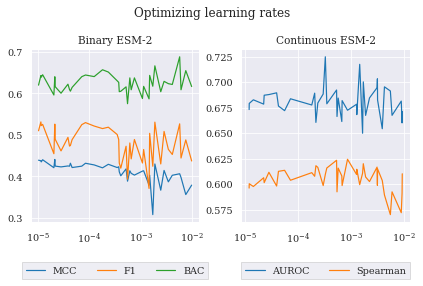

In [56]:
%matplotlib inline
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3))
fig.tight_layout(h_pad=1)

df_hyp_disprot_esm2.groupby(by='config/learning_rate').mean()[['mcc', 'f1', 'bac']].plot(ax=ax1, rot=0, title='Binary ESM-2', legend=False, xlabel='', logx=True)

df_hyp_chezod_esm2.groupby(by='config/learning_rate').mean()[['auroc', 'spearman']].plot(ax=ax2, rot=0, title='Continuous ESM-2', legend=False, xlabel='', logx=True)

#df_hyp_chezod_esm1.groupby(by='config/encoder_learning_rate').mean()[['auroc', 'spearman']].plot(ax=ax3, rot=0, title='Encoder learning rate (Continuous ESM-1b)', legend=False, xlabel='', logx=True)

ax1.legend(labels=['MCC', 'F1', 'BAC'], loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=3)
ax2.legend(labels=['AUROC', 'Spearman'], loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=False, shadow=False, ncol=2)
fig.suptitle('Optimizing learning rates', fontsize=12, y=1.13)
fig.savefig('../figures/2022-10-26_hyperparam_tune/bars_hyperparam_learning_rates.png', bbox_inches='tight')
plt.show()

### Export results to CSV

In [54]:
df_disprot_esm2_export = df_hyp_disprot_esm2[['mcc', 'f1', 'bac', 'time_this_iter_s', 'config/cnn_bottleneck', 'config/cnn_kernel_n',
     'config/precision', 'config/learning_rate']].sort_values('mcc', ascending=False).round({'mcc': 2, 'f1': 2, 'bac': 2, 'time_this_iter_s': 1, 'config/learning_rate': 5}).rename(
    columns={'time_this_iter_s': 's/epoch', 'training_iteration': 'epochs', 'config/cnn_bottleneck': 'cnn neurons', 'config/cnn_kernel_n': 'kern size', 'config/precision': 'precision', 'config/learning_rate': 'learn rate'})
df_disprot_esm2_export.to_csv('../data/results/hyperparam_tune/hparam_results_disprot_esm2.csv', index=False)
df_disprot_esm2_export

,mcc,f1,bac,s/epoch,cnn neurons,kern size,precision,learn rate
trial_id,,,,,,,,
a06ad_00001,0.44,0.53,0.64,930.4,56,3,32,0.00002
a06ad_00023,0.44,0.53,0.65,935.8,56,5,32,0.00001
a06ad_00024,0.44,0.51,0.62,930.3,28,3,32,0.00001
a06ad_00014,0.44,0.53,0.64,935.9,56,5,32,0.00001
a06ad_00022,0.44,0.52,0.64,930.7,28,3,16,0.00001
a06ad_00036,0.43,0.47,0.61,931.0,28,3,32,0.00004
a06ad_00006,0.43,0.53,0.64,934.9,56,5,16,0.00008
a06ad_00018,0.43,0.53,0.67,936.8,56,8,16,0.00189
a06ad_00003,0.43,0.52,0.65,933.4,56,3,32,0.00024


In [55]:
df_chezod_esm2_export = df_hyp_chezod_esm2[['auroc', 'spearman', 'time_this_iter_s', 'config/cnn_bottleneck', 'config/cnn_kernel_n', 'config/precision', 'config/learning_rate']].sort_values('auroc', ascending=False).round({'auroc': 2, 'spearman': 2, 'time_this_iter_s': 1, 'config/learning_rate': 5}).rename(
    columns={'time_this_iter_s': 's/epoch', 'training_iteration': 'epochs', 'config/cnn_bottleneck': 'cnn neurons', 'config/cnn_kernel_n': 'kern size', 'config/precision': 'precision', 'config/learning_rate': 'learn rate'})
df_chezod_esm2_export.to_csv('../data/results/hyperparam_tune/hparam_results_chezod_esm2.csv', index=False)
df_chezod_esm2_export

,auroc,spearman,s/epoch,cnn neurons,kern size,precision,learn rate
trial_id,,,,,,,
2d359_00017,0.73,0.61,696.5,56,8,32,0.00033
2d359_00021,0.72,0.60,695.8,14,8,32,0.00145
2d359_00027,0.70,0.60,689.7,28,5,16,0.00312
2d359_00004,0.70,0.62,692.3,28,3,32,0.00170
2d359_00037,0.70,0.59,693.1,56,8,16,0.00423
2d359_00003,0.69,0.62,690.6,28,3,32,0.00308
2d359_00038,0.69,0.62,692.7,14,3,16,0.00053
2d359_00028,0.69,0.57,694.1,14,8,32,0.00547
2d359_00002,0.69,0.60,694.1,14,8,16,0.00004
